# Laboratorio Clustering

## Clusterin Sin Signal

In [4]:
#Zona de importaciones
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### K-Means

In [61]:
#Importando los datos
sindata = pd.read_excel('Sin2.xlsx',header=None,names=['X','Y'])
sindata2 =  sindata.values
sindata.tail()

,X,Y
83957,195005,13817
83958,195015,15007
83959,195022,12918
83960,195026,13205
83961,195029,12346


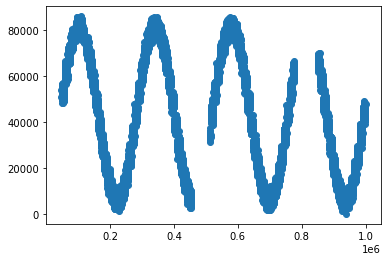

In [6]:
#Visualizando el Dataset
plt.scatter(x='X',y='Y',data=sindata)
plt.show()

In [7]:
#Realizamos el ajusste para K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(sindata2)

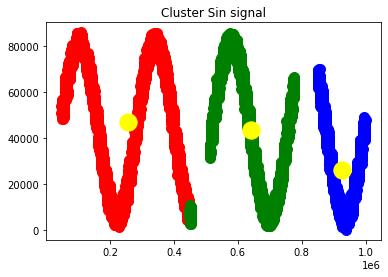

In [8]:
#Visualizamos los clusters
plt.scatter(sindata2[y_kmeans == 0, 0], sindata2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(sindata2[y_kmeans == 1, 0], sindata2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(sindata2[y_kmeans == 2, 0], sindata2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Cluster Sin signal')

plt.show()

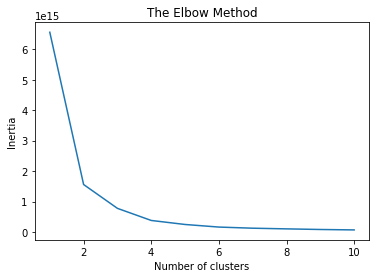

In [9]:
#Lo anterior fue con un K dado arbitrariamente. Busquemos el K más óptimo con Elbow Method
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(sindata)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
#Podemos observar que el K que mejor se ajusta es K=4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(sindata2)

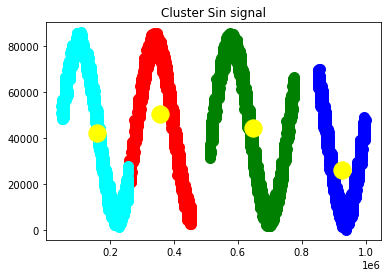

In [11]:
#Volvemos a gráficar, pero ahora con K = 4
#Visualizamos los clusters
plt.scatter(sindata2[y_kmeans == 0, 0], sindata2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(sindata2[y_kmeans == 1, 0], sindata2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(sindata2[y_kmeans == 2, 0], sindata2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(sindata2[y_kmeans == 3, 0], sindata2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster Sin signal')
plt.show()

### DBSCAN

In [12]:
#Cargamos otra vez los datos
sindata3 = sindata.values

In [13]:
#Normalizamos los datos
sindata3 = StandardScaler().fit_transform(sindata3)

In [28]:
#Ajustamos ahora los datos para DBSCAN, lo hacemos primero con un Epsilon y un Min cualquiera
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
model = dbscan.fit(sindata3)

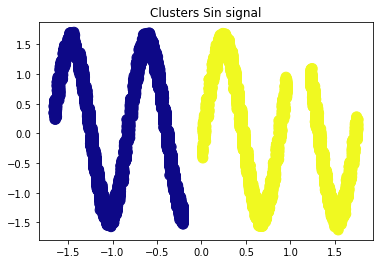

In [29]:
#Visualizamos los clusters realizados con DBSCAN
y_dbscan = dbscan.fit_predict(sindata3)
plt.scatter(sindata3[:, 0], sindata3[:, 1], s = 100, c = y_dbscan, cmap='plasma')
plt.title('Clusters Sin signal')
plt.show()

In [16]:
#Busquemos ahora el Epsilon y el Min_Point óptimos
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(sindata3)
distances, indices = nbrs.kneighbors(sindata3)

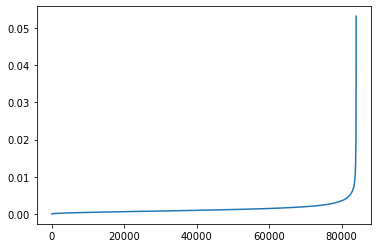

In [17]:
#Ordenamos y gráficamos
distances = np.sort(distances, axis=0)
distances2 = distances[:,1]
plt.plot(distances2)
plt.show()

In [48]:
#Ajustemos el modelo nuevamente, pero ahora con un Epsilon = 0.02
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
model = dbscan.fit(sindata3)

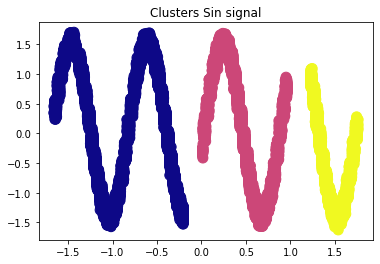

In [31]:
#Gráfiquemos nuevamente
y_dbscan = dbscan.fit_predict(sindata3)
plt.scatter(sindata3[:, 0], sindata3[:, 1], s = 100, c = y_dbscan, cmap='plasma')
plt.title('Clusters Sin signal')
plt.show()

In [21]:
#Realicemos ahora una comparación entre los dos algorimtos, K-Means y DBSCAN
labels = dbscan.labels_
print('Silhouette coefficient DBSCAN: %0.3f' % metrics.silhouette_score(sindata3,labels))

Silhouette coefficient DBSCAN: 0.269


In [22]:
labels2 = kmeans.labels_
print('Silhouette coefficient K-Means: %0.3f' % metrics.silhouette_score(sindata2,labels2))

Silhouette coefficient K-Means: 0.610


<p>Ahora bien, si observamos en la segunda gráfica del DBSCAN. en vez de poner 0.02, que es aproximadamente donde marca la gráfica que sería el optimo, se colocó 0.2. Si bien, con 0.2 la gráfica se ve "mejor" no quiere decir que sea el mejor valor para ese parámetro. Observemos en la parte de abajo, como queda la gráfica y el coegiciente de Silhouette después de haber ajustado el algoritmo con un epsilon de 0.02. </p>

In [74]:
dbscan2 = DBSCAN(eps=0.02, min_samples=5)
model2 = dbscan2.fit(sindata3)

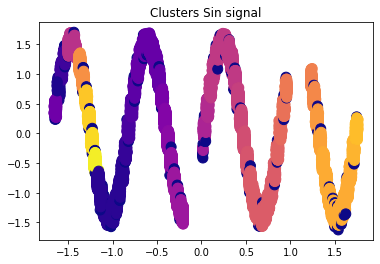

In [75]:
y_dbscan2 = dbscan2.fit_predict(sindata3)
plt.scatter(sindata3[:, 0], sindata3[:, 1], s = 100, c = y_dbscan2, cmap='plasma')
plt.title('Clusters Sin signal')
plt.show()

In [47]:
labels3 = dbscan2.labels_
print('Silhouette coefficient DBSCAN: %0.3f' % metrics.silhouette_score(sindata3,labels3))

Silhouette coefficient DBSCAN: 0.526


<p>Comparando los coeficientes, es posible observar que para un epsilon de 0.02 es mayor que para un epslion de 0.2, cosa que no se ve a simple vista. Ahora bien, aún así DBSCAN sigue teniendo un coeficiente menor y es que esto se presenta porque si observamos, solo se modificó el Epsilon más no el Min_samples y es que no es posible modificarlo al valor que muestra la gráfica que es 80.000, pues al hacerlo todos los puntos se mostrarían como ruido. </p>

## Clustering FIFA Players 

In [51]:
#Cargando los datos 
fifadata = pd.read_csv('data.csv')
fifadata.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Con 2 features

In [52]:
#Extraemos las columnas que vamos a utilizar
fifadata1 = fifadata.iloc[:, [3,5]].values

In [53]:
#Verificamos que sean las correctas
fifadata1

array([[31, 94],
       [33, 94],
       [26, 92],
       ...,
       [16, 47],
       [17, 47],
       [16, 46]], dtype=int64)

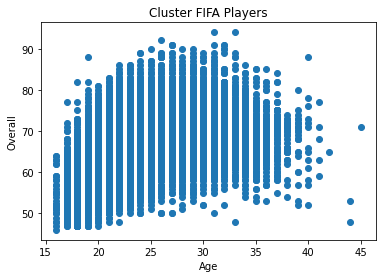

In [54]:
#Veamos rápidamente los datos seleccionados
plt.scatter(fifadata1[:,0],fifadata1[:,1])
plt.title('Cluster FIFA Players')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.show()

<p>Como era de esperarse, es casi imposible realizar, a simple vista, una correcta división.</p>

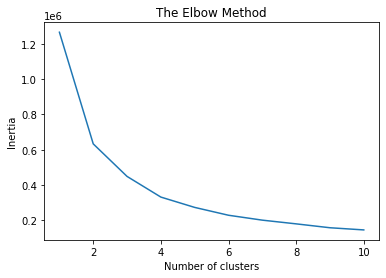

In [55]:
#Primero busquemos el K que mejor se ajusta
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(fifadata1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [56]:
#Ajustamos el modelo para K = 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(fifadata1)

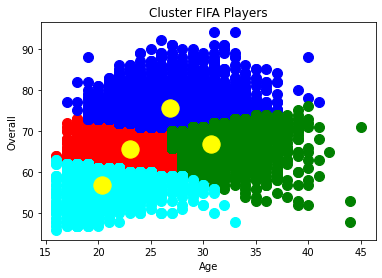

In [57]:
#Gráficamos los clusters
plt.scatter(fifadata1[y_kmeans == 0, 0], fifadata1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(fifadata1[y_kmeans == 1, 0], fifadata1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(fifadata1[y_kmeans == 2, 0], fifadata1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(fifadata1[y_kmeans == 3, 0], fifadata1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster FIFA Players')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.show()

Text(799.4285227272726, 0.5, 'Overall')

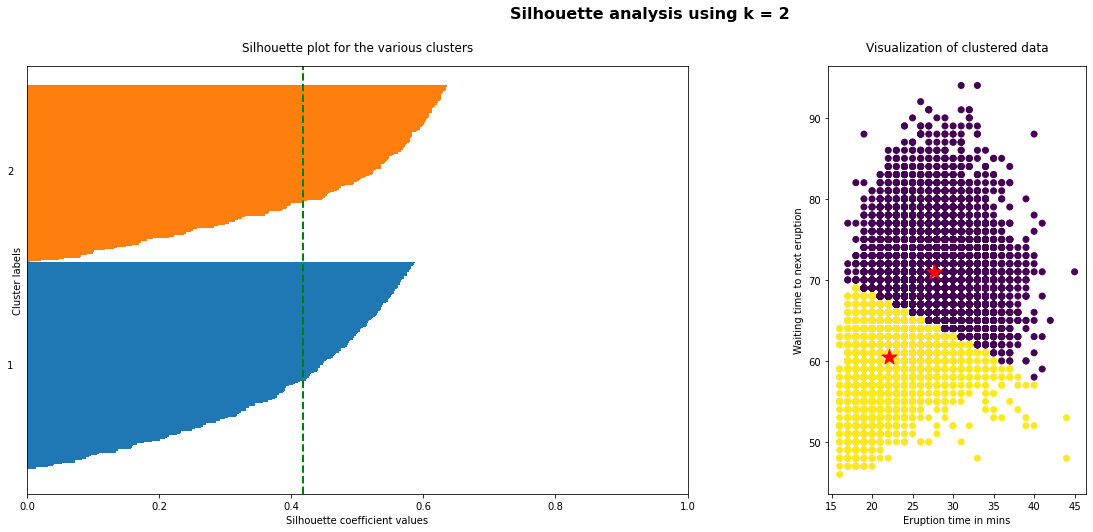

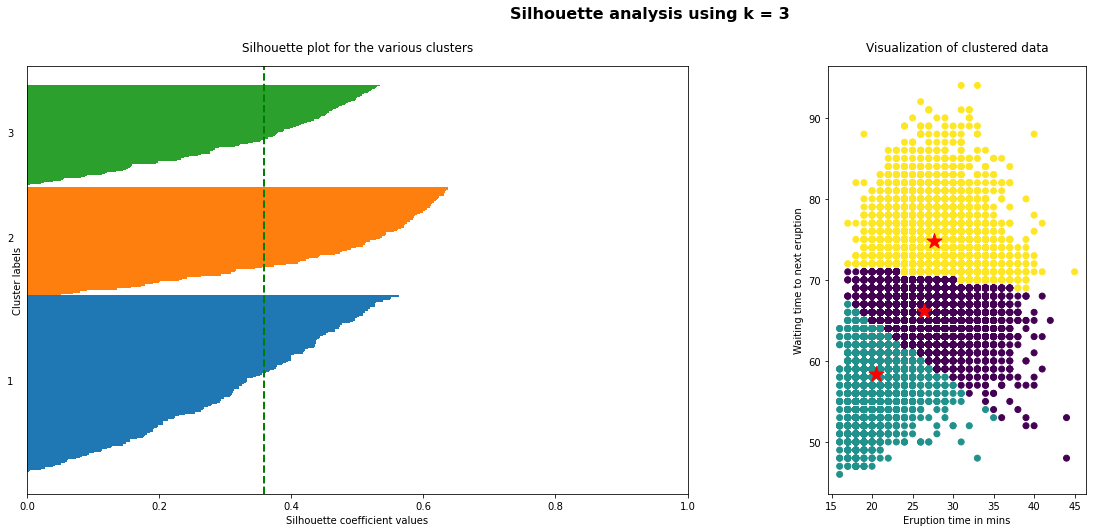

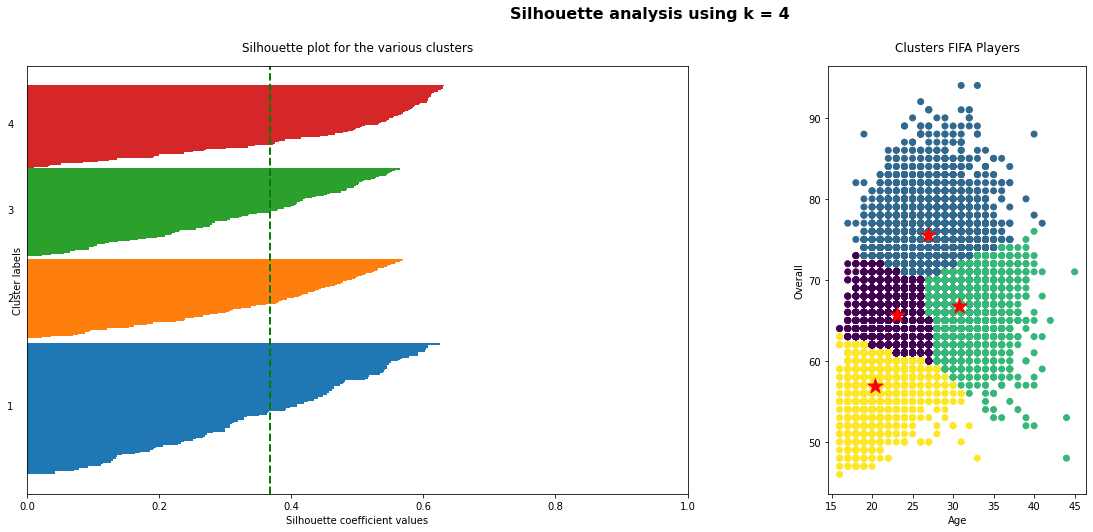

In [60]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2,3,4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(fifadata1)
    centroids = km.cluster_centers_

    # Get silhouette samples - coefficients
    silhouette_vals = silhouette_samples(fifadata1, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0

    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([0, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(fifadata1[:, 0], fifadata1[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}', fontsize=16, fontweight='semibold', y=1.05);
    

plt.title('Clusters FIFA Players')
plt.xlabel('Age')
plt.ylabel('Overall')

<p>Si bien, se había escogido un K=4 por Elbow Method, analizando los Silohuttes, se observa que el mejor K es 2. Por lo tanto hubo una mala elección al momento de escoger el K</p>

### Con 6 features

In [9]:
# Lo que se hace acá es quitar el símbolo € y reemplazarlo por un valor float
def currency_transform(amount):
    if "M" in amount:
        amount = amount.replace("M", "")
        amount = amount.replace("€", "")
        amount = float(amount) * 1e+6
    else:
        amount = amount.replace("K", "")
        amount = amount.replace("€", "")
        amount = float(amount) * 1e+3

    return amount

fifadata.loc[:, "Value"] = fifadata["Value"].apply(lambda value: currency_transform(value))

In [10]:
#Una vez transformados los datos, borramos aquellas filas que tienen valores nulos y capturamos las columnas que queremos usar
fifadata.dropna(subset = ["Age","Overall", "Skill Moves", "Value", "Weak Foot", "International Reputation"], inplace=True)
fifadata2 = fifadata.iloc[:, [3,5,8,10,11,12]].values

In [11]:
#Ajustamos el modelo
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(fifadata2)

In [78]:
#Como no es posible gráficar 6 dimensiones, se calcula el número de clusters que se formaron
labels = kmeans.labels_
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
print('Number of clusters: %0.0f' % n_clusters_)
print('Number of total groups: %0.0f' % len(Counter(labels).keys()))

Number of clusters: 4
Number of total groups: 4
